In [6]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf
tf.config.experimental.list_physical_devices()
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Dense ,Dropout, Flatten
from tensorflow.keras.layers import Input
#import matplotlib.pyplot as plt

In [10]:
import matplotlib.pyplot as plt

In [14]:
total_images=0
dir=os.listdir("Images/")
for d in dir:
    files=list(os.listdir("Images/"+d))
    print(d+" Folder Has "+str(len(files))+"images")
    total_images=total_images+len(files)
#print("Total Images : " ,total_images)
print("Total Images :" ,total_images)


daisy Folder Has 765images
dandelion Folder Has 1052images
rose Folder Has 784images
sunflower Folder Has 733images
tulip Folder Has 984images
Total Images : 4318


In [15]:
base_dir="Images/"
training_dataset=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                           image_size=(180,180),
                                                           seed=123,
                                                           validation_split=0.2,
                                                           subset='training',
                                                            batch_size=32)

Found 4321 files belonging to 5 classes.
Using 3457 files for training.


In [16]:
validation_dataset=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                           image_size=(180,180),
                                                           seed=123,
                                                           validation_split=0.2,
                                                           subset='validation',
                                                              batch_size=32)

Found 4321 files belonging to 5 classes.
Using 864 files for validation.


In [17]:
flower_names=training_dataset.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

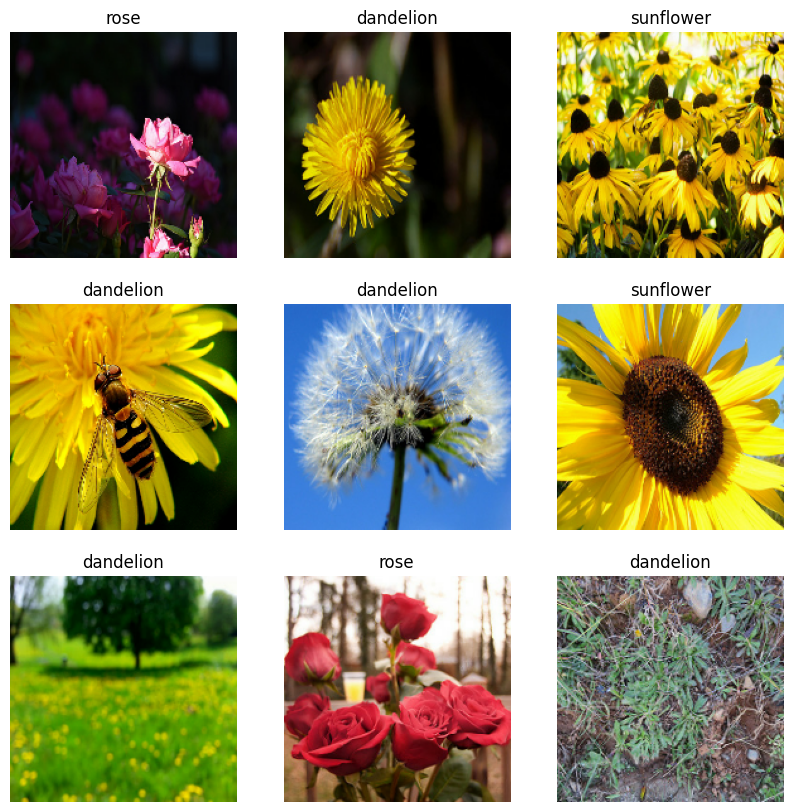

In [18]:
plt.figure(figsize=(10,10))

for images , labels in training_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis("off")

In [19]:
AUTOTUNE =tf.data.AUTOTUNE

In [21]:
training_dataset=training_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [23]:
validation_dataset=validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
data_augmentation=Sequential([
    Input(shape=(180,180,3v )),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)    
])

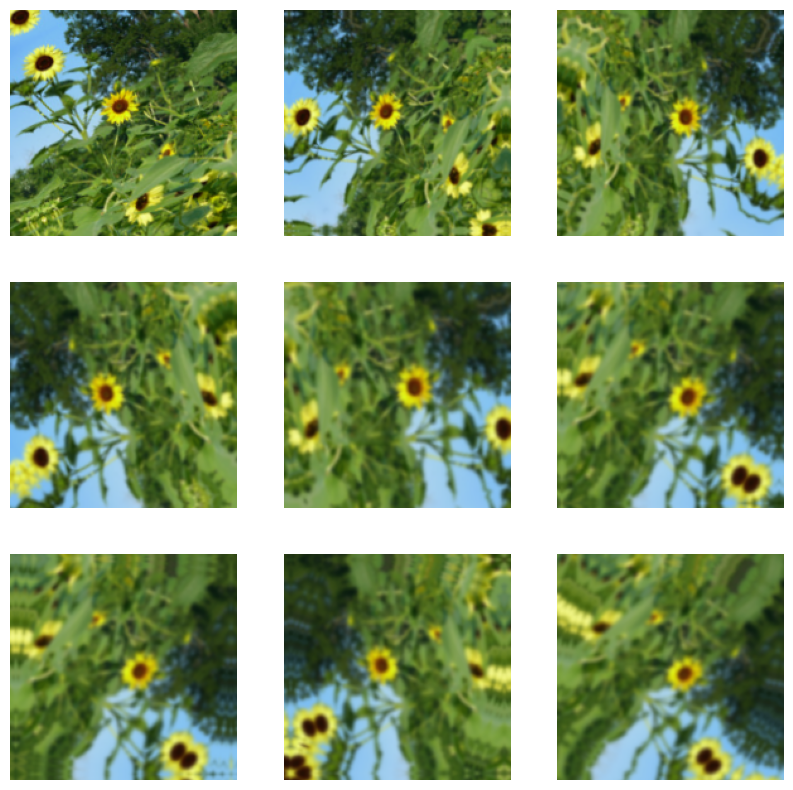

In [25]:
i=0
plt.figure(figsize=(10,10))

for images , labels in training_dataset.take(1):
    for i in range(9):
        images=data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis("off")

In [28]:
model=Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(6)
    
])
model.build(input_shape=(None, 180, 180, 3))

In [29]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,414 (15.22 MB)

 Trainable params: 3,989,414 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history =model.fit(training_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 63s 554ms/step - accuracy: 0.3550 - loss: 1.5114 - val_accuracy: 0.5787 - val_loss: 1.0855
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 59s 540ms/step - accuracy: 0.5705 - loss: 1.0899 - val_accuracy: 0.5891 - val_loss: 1.0611
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 59s 537ms/step - accuracy: 0.6103 - loss: 0.9803 - val_accuracy: 0.6678 - val_loss: 0.8882
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 62s 565ms/step - accuracy: 0.6733 - loss: 0.8461 - val_accuracy: 0.6296 - val_loss: 0.9824
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 61s 558ms/step - accuracy: 0.6857 - loss: 0.8135 - val_accuracy: 0.7002 - val_loss: 0.8092
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 60s 552ms/step - accuracy: 0.6990 - loss: 0.7693 - val_accuracy: 0.6701 - val_loss: 0.8350
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 57s 523ms/step - accuracy: 0.7154 - loss: 0.7385 - val_accuracy: 0.6806 - val_loss: 0.7940
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 59s 542ms/step - accuracy: 0.7229 - loss: 0

In [20]:
accuracy=model.evaluate(training_dataset)
print("%s: %2f%%"%(model.metrics_names[1],accuracy[1]*100))

109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.7754 - loss: 0.6079
compile_metrics: 77.755278%


In [21]:
model.save('Flower_Recog_aarchi.keras')